In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = "data/train.csv"
test = "data/test.csv"


train_df = pd.read_csv(train, index_col='Id')
test_df = pd.read_csv(test, index_col='Id')

Y_col = train_df['SalePrice']

train_df = train_df.drop(columns = 'SalePrice')

all_data = pd.concat((train_df, test_df), sort=False)

print(test_df.shape)
print(train_df.shape)

(1459, 79)
(1460, 79)


In [3]:
# Check if any column contains a NaN value
#print(df.isnull().any())

# Provides a NaN count for each column.
#print(df.isnull().sum())

# Checking % data is null set in the data columns
null_col = (all_data.isnull().sum()/len(all_data)) * 100
null_col = null_col.sort_values(ascending=False)
#print(null_col[:40])
#print(all_data.isnull().sum().sort_values(ascending=False)[:20])

# Remove column if all value in it are NaN.
#df = df.dropna(axis=1, how='all')

# Remove row if all value in it are NaN.
#df = df.dropna(axis=0, how='all')

#df = df.isnull().sum()
#print (df)

In [4]:
# Dropping columns which has mostly all data cell as Null
all_data = all_data.drop(columns = {'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'})
print(all_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [5]:
#Filling LotForntage cell with median value
LotFrontAge_Col_Grouped = all_data.groupby("Neighborhood")["LotFrontage"]

#Check each tuple values
#for item in LotFrontAge_Col_Grouped:
    #print(item)
    
all_data['LotFrontage'] = LotFrontAge_Col_Grouped.transform(lambda x : x.fillna(x.median()))

#Check NaN values
print(all_data['LotFrontage'].isnull().sum())

0


In [6]:
#Filling Garage related columns missing value with 0

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
print(all_data['GarageType'].isnull().sum())
print(all_data['GarageFinish'].isnull().sum())
print(all_data['GarageQual'].isnull().sum())
print(all_data['GarageCond'].isnull().sum())
print(all_data['GarageYrBlt'].isnull().sum())

0
0
0
0
159


In [7]:
#Filling Basement related columns missing value with 0

for col in('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col]=all_data.fillna('None')
    
print(all_data['BsmtQual'].isnull().sum())
print(all_data['BsmtCond'].isnull().sum())
print(all_data['BsmtExposure'].isnull().sum())
print(all_data['BsmtFinType1'].isnull().sum())
print(all_data['BsmtFinType2'].isnull().sum())

0
0
0
0
0


In [8]:
#Filling Masonry veneer type and area with None and 0 repectively
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

print(all_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [9]:
#Filling columns with mode values where very few values are missing.
col_for_mode_fill = ('MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Electrical')

for col in col_for_mode_fill:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])


for col in ('TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageCars', 'GarageArea'):
    all_data[col] = all_data[col].fillna(0)

all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)
#print(all_data['GarageYrBlt'].unique())


In [10]:
#Performing label encoading to categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = all_data.select_dtypes(exclude=["int64","float64"]).columns
print(categorical_columns[:])
for col in categorical_columns:
    #print(col)
    lbl = LabelEncoder() 
    lbl.fit(all_data[col]) 
    #print(list(lbl.classes_))
    all_data[col] = lbl.transform(all_data[col])

print(all_data.shape)

all_data = pd.get_dummies(all_data)

print(all_data.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
(2919, 74)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQ

In [11]:
ntrain = train_df.shape[0]
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]

train_data = train_data[:-1]

print(train_data.shape)
print(test_data.shape)

(1459, 74)
(1459, 74)


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(train_data, test_data)

#Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)


predict_Y = regr.predict(X_test)

#print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test, predict_Y)))
print('Variance score: %.2f' % r2_score(Y_test, X_test))

Mean squared error: 596.97
Variance score: -1.18


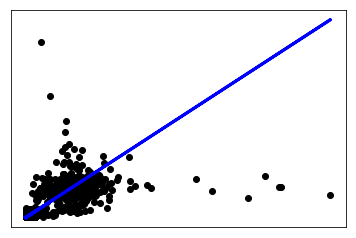

In [13]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, X_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()